# Key Levels mix clustering

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
from sklearn.cluster import KMeans
import pickle

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()
back_bar = 10
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(back_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()
data["RSI"] = ta.rsi(data["Close"], length=14)
data['ibs'] = data.apply(lambda x: (-1.0 if (x["High"] == x["Low"]) else (x["Close"] - x["Low"]) / (x["High"] - x["Low"])), axis=1)
data['sum_ibs'] = data['ibs'].rolling(3).sum()
data

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next,RSI,ibs,sum_ibs
Date,,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,NaN,NaN,NaN,NaN,NaN,0.285714,NaN
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,NaN,NaN,NaN,NaN,NaN,0.666667,NaN
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,NaN,NaN,NaN,NaN,NaN,0.714286,1.666667
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,NaN,NaN,NaN,NaN,NaN,0.375000,1.755952
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,NaN,NaN,NaN,NaN,NaN,1.000000,2.089286
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524,1300.9,NaN,1295.6,NaN,48.873066,0.187500,1.531029
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161,1300.9,NaN,1295.9,NaN,49.314332,-1.000000,0.011029
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627,1300.9,NaN,1295.9,NaN,54.778494,-1.000000,-1.812500


In [4]:
data.dropna(inplace=True)
data['is_r_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_prev'] and r['High'] == r['max_next']) else False, axis=1)
data['is_s_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_prev'] and r['Low'] == r['min_next']) else False, axis=1)
data

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next,RSI,ibs,sum_ibs,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,,,,
2018-08-13 10:10:00,945.0,945.3,944.5,945.2,1196,946.4,945.7,943.3,942.3,60.595972,0.875000,0.875000,False,False
2018-08-13 10:15:00,945.0,945.7,944.9,945.2,1401,946.4,945.7,943.3,942.3,60.595972,0.375000,1.250000,False,False
2018-08-13 10:20:00,945.3,945.5,943.8,944.0,1245,946.4,945.5,943.3,942.3,48.029709,0.117647,1.367647,False,False
2018-08-13 10:25:00,944.0,944.2,943.5,943.9,1538,946.4,946.1,943.3,942.3,47.152168,0.571429,1.064076,False,False
2018-08-13 10:30:00,944.0,944.4,943.5,943.8,1254,946.4,946.1,943.5,942.3,46.242293,0.333333,1.022409,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25 13:40:00,1295.7,1297.4,1295.6,1297.4,3080,1298.8,1300.9,1294.9,1295.6,52.055849,1.000000,2.307692,False,False
2024-11-25 13:45:00,1297.7,1297.8,1296.4,1297.0,2840,1298.8,1300.9,1294.9,1295.9,50.034069,0.428571,1.736264,False,False
2024-11-25 13:50:00,1297.0,1300.2,1297.0,1299.0,8748,1300.2,1300.9,1294.9,1295.9,58.676175,0.625000,2.053571,False,False


In [5]:
top_data = data[data['is_r_keylevel'] == True]
bot_data = data[data['is_s_keylevel'] == True]
rac_data = data[(data['is_r_keylevel'] != True) & (data['is_s_keylevel'] != True)]

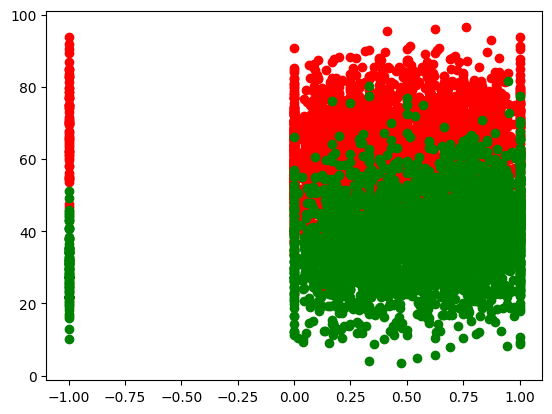

In [6]:
plt.scatter(top_data['ibs'], top_data['RSI'], c='red')
plt.scatter(bot_data['ibs'], bot_data['RSI'], c='green')
# plt.scatter(rac_data['ibs'], rac_data['RSI'], c='yellow')

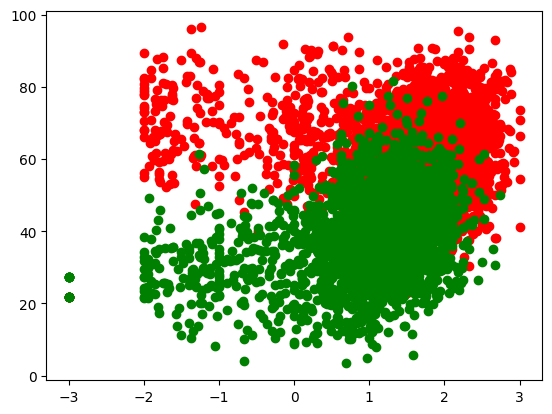

In [8]:
plt.scatter(top_data['sum_ibs'], top_data['RSI'], c='red')
plt.scatter(bot_data['sum_ibs'], bot_data['RSI'], c='green')
# plt.scatter(rac_data['sum_ibs'], rac_data['RSI'], c='yellow')